In [1]:
# Extendido de:
# http://scikit-learn.org/dev/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

In [2]:
COLAB = True

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.datasets import load_digits
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA

In [4]:
#digits = load_digits(n_class=6)
digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
lado = int(np.sqrt(n_features))

print("núm. muestras       =", n_samples)
print("núm. atributos      =", n_features)
print("dígitos             =", np.unique(y))
print("lado de cada imagen =", lado)

núm. muestras       = 1797
núm. atributos      = 64
dígitos             = [0 1 2 3 4 5 6 7 8 9]
lado de cada imagen = 8


In [5]:
X.shape

(1797, 64)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
pca.fit(X)
datos_comprimidos = pca.transform(X)
datos_descomprimidos = pca.inverse_transform(datos_comprimidos)
# error cuadrático medio entre los datos originales X y los descomprimidos:
((X - datos_descomprimidos)**2).mean()

6.43740484487223e-06

In [7]:
X.var()

36.20173240585726

In [8]:
# La parte de varianza que explico con PCA es:
X.var() - ((X - datos_descomprimidos)**2).mean()

36.201725968452415

In [9]:
datos_descomprimidos.var()

36.2017259684524

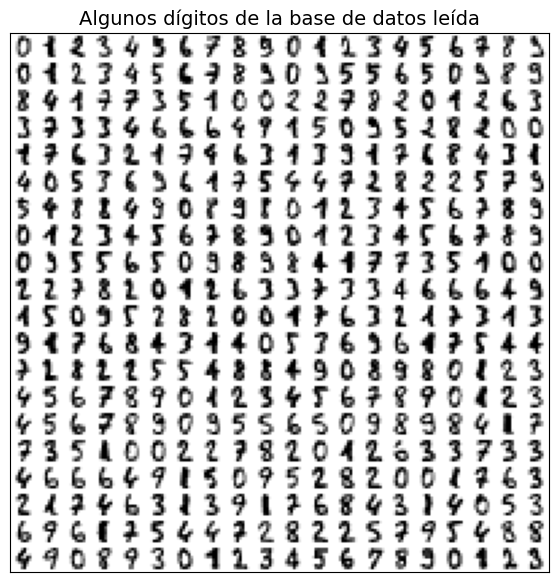

In [ ]:
#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + lado, iy:iy + lado] = X[i * n_img_per_row + j].reshape((lado, lado))

plt.figure(figsize=(7,7))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Algunos dígitos de la base de datos leída', fontsize=14)
plt.show()

In [ ]:
X.shape

(1797, 64)

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

ejemplo 0 en X:


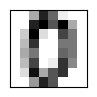

Como vector:

 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

puesto como matriz 8 x 8 :

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

El y de este ejemplo es 0


In [ ]:
ejemplo = 0
print("ejemplo", ejemplo, "en X:")
plt.figure(figsize=(1,1))
plt.imshow(X[ejemplo].reshape((lado,lado)), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('', fontsize=14)
plt.show()

print("Como vector:\n\n", X[0])
print("\npuesto como matriz", lado, "x", lado, ":\n")
print(X[0].reshape((lado,lado)))
print("\nEl y de este ejemplo es", y[ejemplo])

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)

# Varianza de las 3 variables nuevas (cantidad de información que mantengo de la original)
print(pca.explained_variance_, pca.explained_variance_.sum())

[179.0069301  163.71774688 141.78843909] 484.51311607187444


In [ ]:
# Varianza total de las 64 variables originales (cantidad de información original)
X.var(axis=0).sum()

1201.4787373626168

In [ ]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
X_nuevas = pca.transform(X)
X_nuevas[0]

array([-1.25946638, 21.27488335, -9.46305462])

In [ ]:
X.shape

(1797, 64)

In [ ]:
X_nuevas.shape

(1797, 3)

#### Cálculo "a mano" de las variables proyectadas:

In [ ]:
pca.components_.shape # matriz W

(3, 64)

In [ ]:
print(X.shape[1])

64


La coordenada i en el espacio PCA se calcula de la siguiente forma:

$$
y_i = {\bf w_i} \cdot ({\bf x} - {\bf \mu})
$$

donde:

* ${\bf w_i}$ es el autovector i (con norma 1)

* ${\bf x}$ es el vector de datos en el espacio original

* ${\bf \mu}$ el vector media en el espacio original.

In [ ]:
ejemplo = 0
componente = 0

print(np.round(pca.components_[componente].dot(X[ejemplo] - pca.mean_), 5))
print(np.round(X_nuevas[ejemplo, componente], 5))

-1.25947
-1.25947


### Visualización

In [ ]:
# Escalar y visualizar los vectores de embedding
def plot_embedding(X, y, pc_x=0, pc_y=1, title=None, figsize=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=figsize)
    ax = plt.subplot(111)
    for i in range(len(X)):
        plt.text(X[i,pc_x], X[i,pc_y], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(len(digits.data)):
            dist = np.sum((X[i,[pc_x,pc_y]] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i,[pc_x,pc_y]]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i],
                                      cmap=plt.cm.gray_r),
                X[i,[pc_x,pc_y]])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title, fontsize=16)

**Proyección aleatoria**

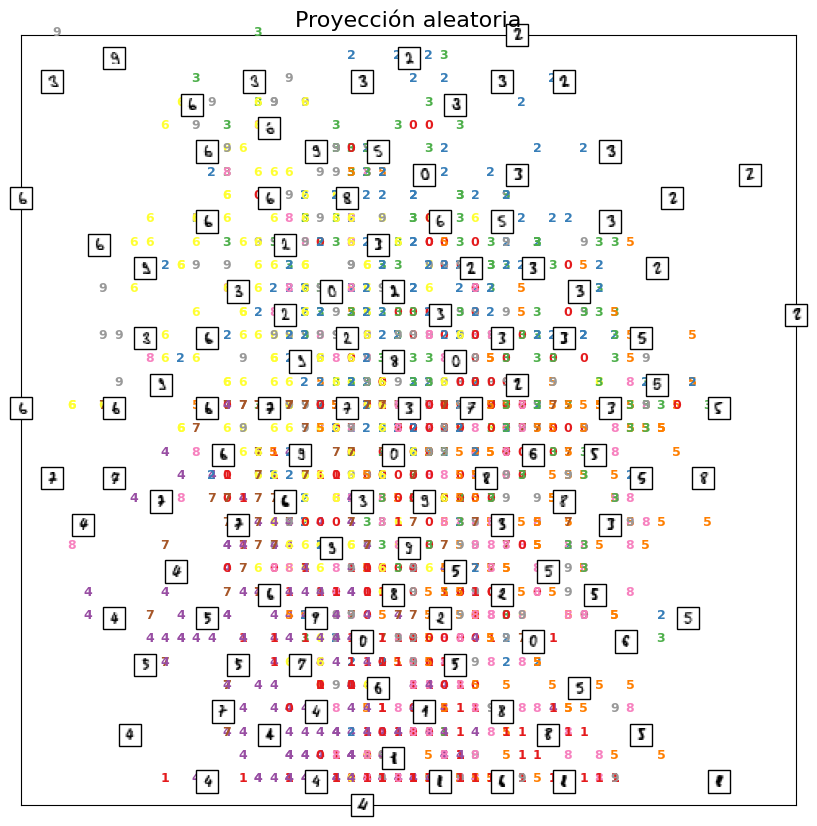

In [ ]:
p_a = SparseRandomProjection(n_components=2,random_state=42)
X_proy = p_a.fit_transform(X)
plot_embedding(X_proy, y, title="Proyección aleatoria", figsize=(10,10))

**Proyección con PCA**

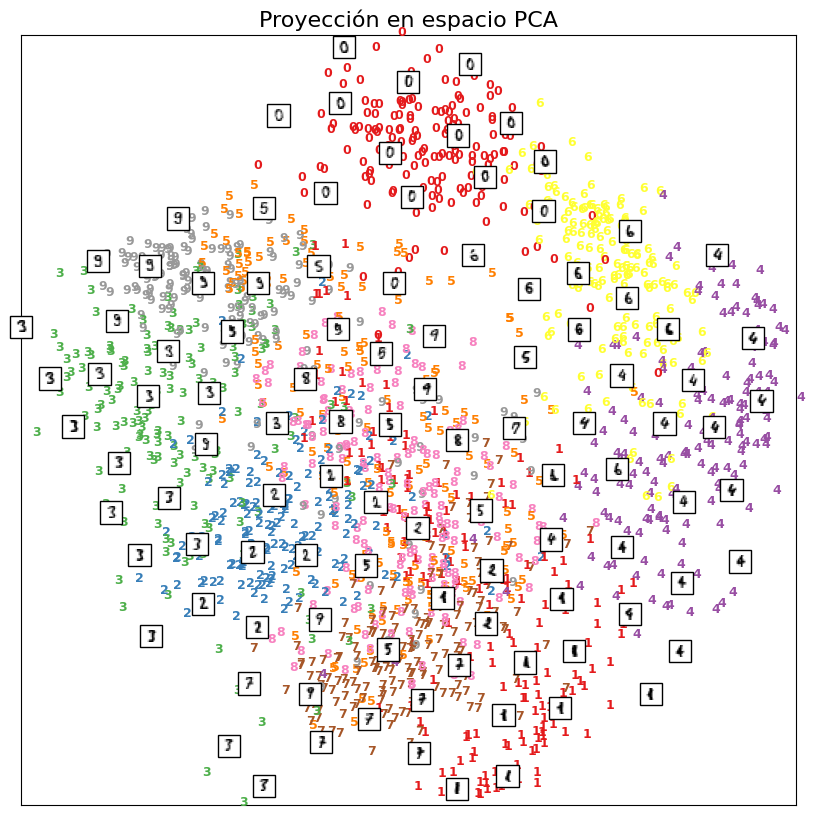

In [ ]:
componente_x = 0 # componente principal que se usará en el eje horizontal
componente_y = 1 # componente principal que se usará en el eje vertical

pca = PCA()

X_proy = pca.fit_transform(X)
plot_embedding(X_proy, y, title="Proyección en espacio PCA",
               pc_x=componente_x, pc_y=componente_y, figsize=(10,10))

ejemplo 200 en X:


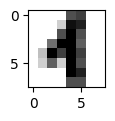

In [ ]:
ejemplo = 200
print("ejemplo", ejemplo, "en X:")
plt.figure(figsize=(1,1))
plt.imshow(X[ejemplo].reshape((lado,lado)), cmap=plt.cm.binary);

[[  7.20773227  -9.86510956 -13.93678288]]


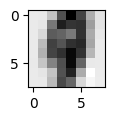

In [ ]:
pca2 = PCA(n_components=3)
pca2.fit(X)

print(pca2.transform(X[ejemplo:(ejemplo+1)]))
descompr = pca2.inverse_transform(pca2.transform(X[ejemplo:(ejemplo+1)]))
plt.figure(figsize=(1,1))
plt.imshow(descompr[0].reshape((lado,lado)), cmap=plt.cm.binary);

**Versión interactiva**

In [ ]:
from ipywidgets import interactive
from ipywidgets import IntSlider, FloatSlider, Dropdown, fixed
from IPython.display import display

interactive(children=(IntSlider(value=0, continuous_update=False, description='pc_x', max=10), IntSlider(value…

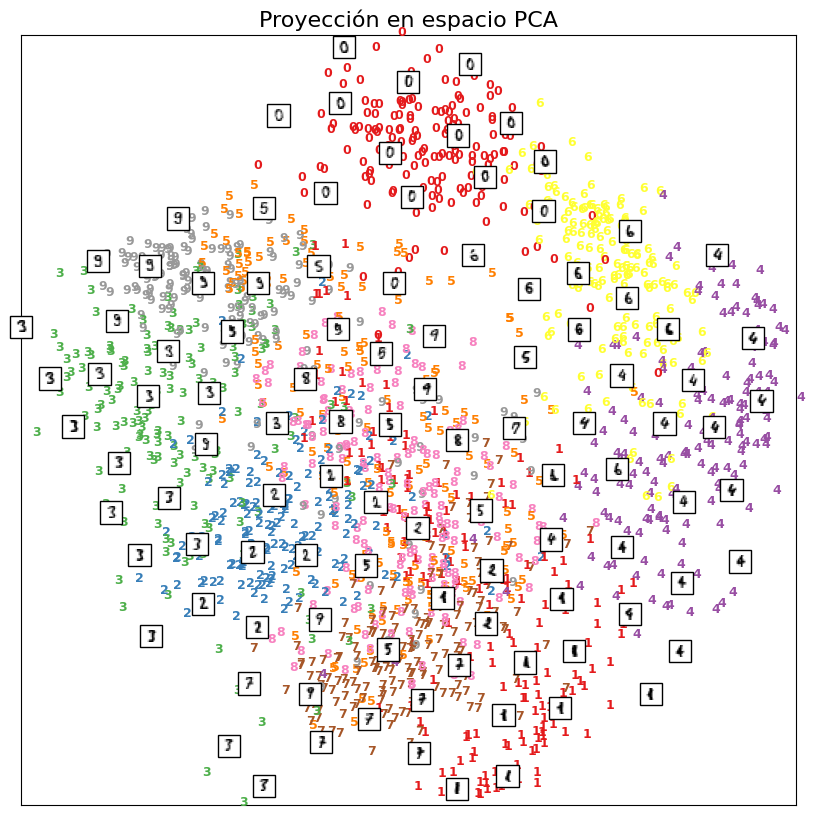

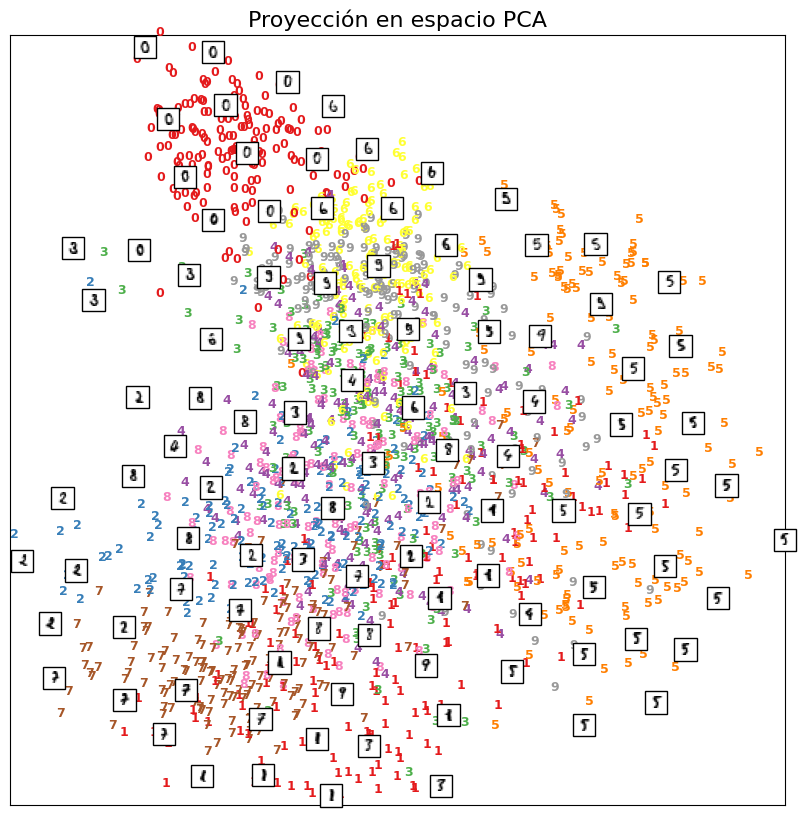

In [ ]:
a = interactive(plot_embedding,
                pc_x=IntSlider(min=0,max=10,value=0,continuous_update=False),
                pc_y=IntSlider(min=0,max=10,value=1,continuous_update=False),
                X=fixed(X_proy),
                y=fixed(y),
                title=fixed("Proyección en espacio PCA"),
                figsize=fixed((10,10))
               )
display(a)

**Versión interactiva en 3D con plotly**

In [ ]:
import plotly.offline as py  # pip install plotly
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
if COLAB:
    def configure_plotly_browser_state():
      import IPython
      display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
                },
              });
            </script>
            '''))

In [ ]:
if COLAB:
    configure_plotly_browser_state()


pc_x = 0
pc_y = 1
pc_z = 2

colors = ['green', 'blue', 'red', 'orange', 'yellow', 'magenta', 'lightblue']
#colors = 10*['black']
colors = 10*colors
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['square', 'circle-open', 'circle', 'diamond', 'cross']
markers = 10*["circle"]
markers = 10*markers

data = []

for digito,c,m in zip(np.unique(y),colors,markers):
    data.append(go.Scatter3d(x=X_proy[y==digito,pc_x],
                             y=X_proy[y==digito,pc_y],
                             z=X_proy[y==digito,pc_z],
                             mode='markers',
                             name='dígito '+str(digito),
                             marker=dict(size=3,
                                         color=c,
                                         symbol=m,
                                         opacity=0.9)))

layout = go.Layout(title='Espacio PCA',
                   scene={"xaxis":{"title":"comp.princ. "+str(pc_x)},
                          "yaxis":{"title":"comp.princ. "+str(pc_y)},
                          "zaxis":{"title":"comp.princ. "+str(pc_z)}
                         }
                  )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
py.plot(fig, filename = "digits.html", auto_open=False) # Grabar figura en html

'digits.html'

In [ ]:
!ls

digits.html  sample_data


In [ ]:
if COLAB:
    from google.colab import files
    files.download('digits.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>